<a href="https://colab.research.google.com/github/KARTHIKEYAN720822103080/KARTHIK/blob/main/diabeties_predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/dataset.csv')


In [ ]:
# Exploring the dataset
print(df.shape)  # Returns the number of rows and columns
print(df.columns)  # Returns column headers
print(df.dtypes)  # Returns the data types of each column
print(df.head())  # Displays the first 5 rows
print(df.info())  # Displays basic information about the DataFrame
print(df.describe().T)  # Returns basic statistics on numeric columns
print(df.isnull().any())  # Checks for null values in the DataFrame


(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0              

In [ ]:
# Data Cleaning
df_copy = df.copy(deep=True)

# Replace 0s with NaN for specified columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_copy[columns_to_replace] = df_copy[columns_to_replace].replace(0, np.NaN)

# Fill missing values
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'] = df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean())
df_copy['SkinThickness'] = df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median())
df_copy['Insulin'] = df_copy['Insulin'].fillna(df_copy['Insulin'].median())
df_copy['BMI'] = df_copy['BMI'].fillna(df_copy['BMI'].median())


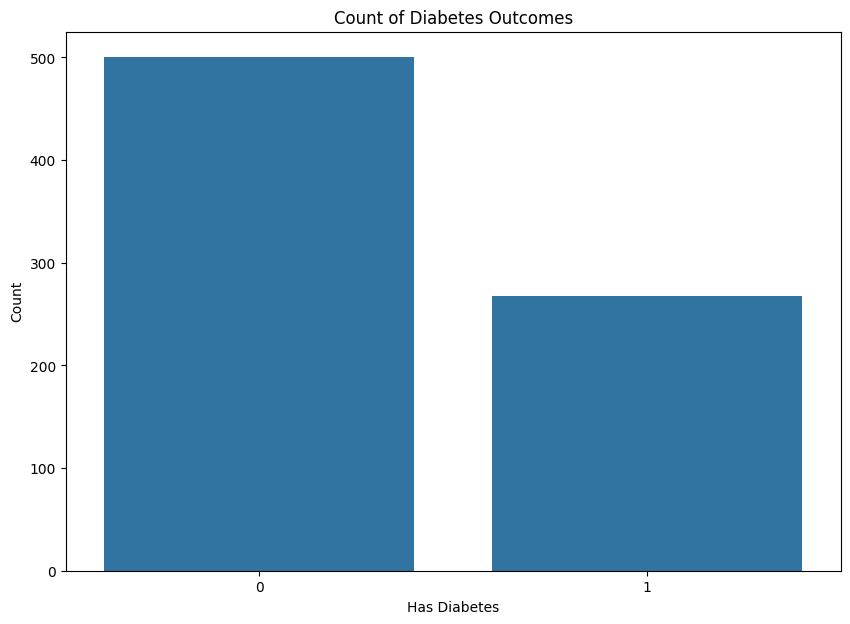

In [ ]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10, 7))
sns.countplot(x='Outcome', data=df_copy)
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.title('Count of Diabetes Outcomes')
plt.show()


In [ ]:
# Splitting the data into features and target variable
X = df_copy.drop(columns='Outcome')
y = df_copy['Outcome']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))


X_train size: (614, 8), X_test size: (154, 8)


In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Finding the best model using GridSearchCV
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {'C': [1, 5, 10]}
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10]}
        },
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {'n_estimators': [10, 15, 20, 50, 100, 200]}
        },
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}
        }
    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

    results = find_best_model(X=train, y=train)
 print(results)


Average Accuracy: 73.292%


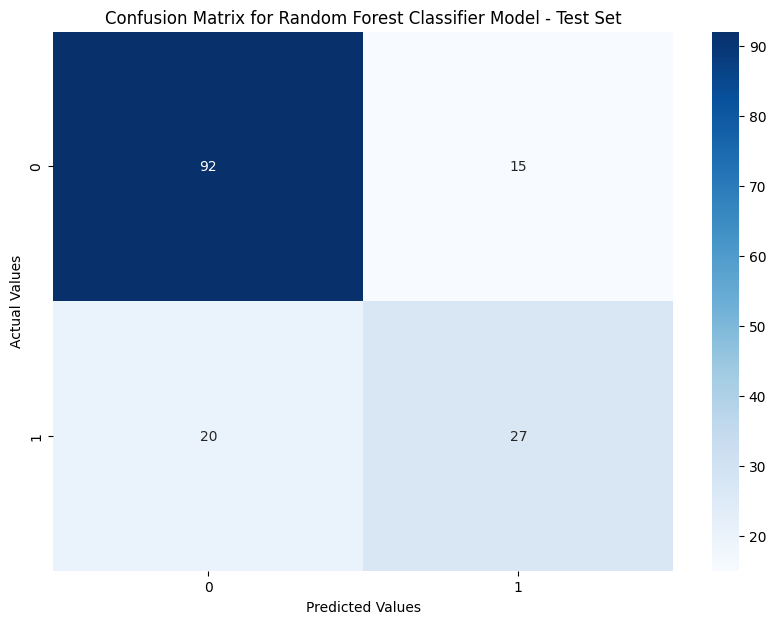

Accuracy on test set: 77.27000000000001%
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       107
           1       0.64      0.57      0.61        47

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
# Using cross_val_score for gaining average accuracy
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy: {}%'.format(round(sum(scores) * 100 / len(scores), 3)))

# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

# Creating a confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Accuracy Score
score = round(accuracy_score(y_test, y_pred), 4) * 100
print("Accuracy on test set: {}%".format(score))
print(classification_report(y_test, y_pred))


In [ ]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    x = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age]])
    x = sc.transform(x)  # Scale the features
    return classifier.predict(x)[0]

# Prediction examples
prediction1 = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)
print("Prediction 1:", "Oops! You have diabetes." if prediction1 else "Great! You don't have diabetes.")

prediction2 = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)
print("Prediction 2:", "Oops! You have diabetes." if prediction2 else "Great! You don't have diabetes.")


Prediction 1: Great! You don't have diabetes.
Prediction 2: Oops! You have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
